Exp 1


In [ ]:
from google.colab  import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
import pandas as pd
df = pd.read_csv("/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Exp 2


In [ ]:
import pandas as pd
df = pd.read_csv("/Iris.csv")
df.info()
df.describe()
df.isnull()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...          

Exp 3

Accuracy: 0.93 


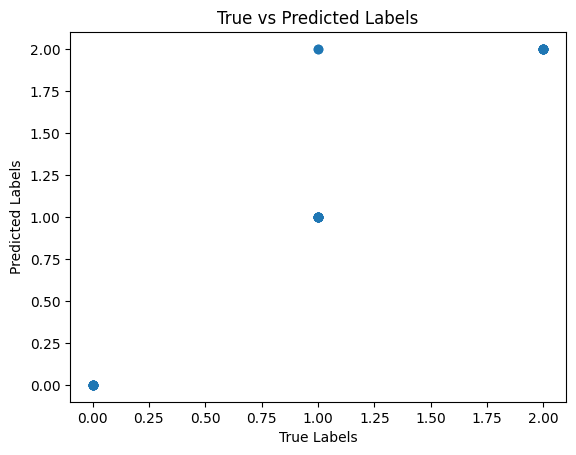

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f} ')

plt.scatter(y_test, y_pred)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Exp 4

Accuracy of Naive Bayes Classifier: 93.33%


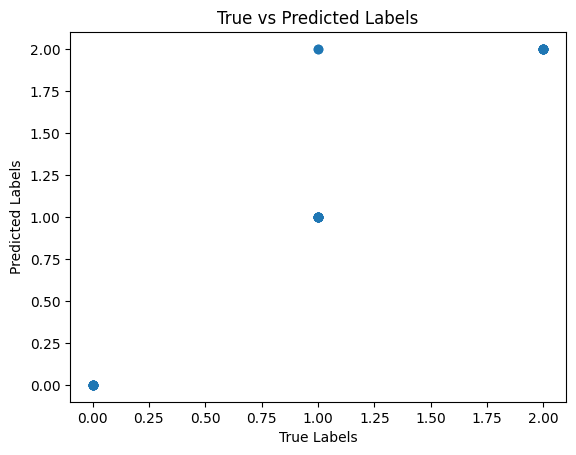

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Naive Bayes Classifier: {accuracy * 100:.2f}%')



plt.scatter(y_test, y_pred)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True vs Predicted Labels')
plt.show()

Exp 5

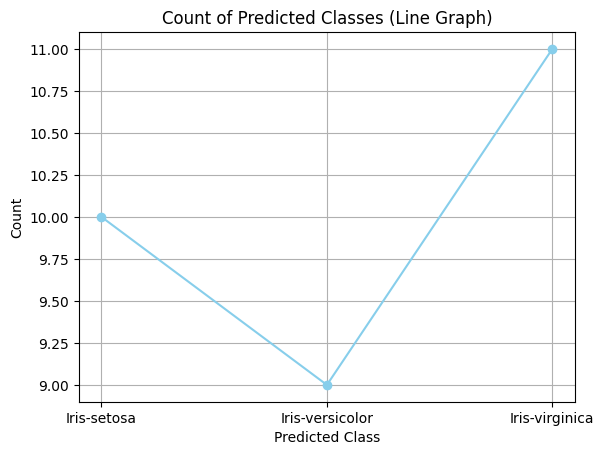

Accuracy: 0.9666666666666667

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/Iris.csv")

if 'Id' in data.columns:
    data = data.drop(columns=['Id'])

X = data.drop("Species", axis=1)
y = data["Species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

unique, counts = np.unique(y_pred, return_counts=True)

plt.plot(unique, counts, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.title('Count of Predicted Classes (Line Graph)')
plt.grid(True)
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

KNN exp 7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("/Iris.csv")


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42, shuffle=True
)


def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


def knn_predict_point(X_train, y_train, test_point, k):
    distances = []
    for i in range(len(X_train)):
        d = euclidean_distance(test_point, X_train[i])
        distances.append((d, y_train[i]))

    distances.sort(key=lambda x: x[0])

    k_nearest = [label for (_, label) in distances[:k]]

    vote_counts = Counter(k_nearest)
    return vote_counts.most_common(1)[0][0]

def knn_predict(X_train, y_train, X_test, k):
    preds = []
    for point in X_test:
        preds.append(knn_predict_point(X_train, y_train, point, k))
    return np.array(preds)


ks = list(range(1, 21, 2))
accuracies = []

for k in ks:
    y_pred = knn_predict(X_train, y_train, X_test, k)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.3f}")

k = 1, Accuracy = 1.000
k = 3, Accuracy = 1.000
k = 5, Accuracy = 1.000
k = 7, Accuracy = 1.000
k = 9, Accuracy = 1.000
k = 11, Accuracy = 1.000
k = 13, Accuracy = 1.000
k = 15, Accuracy = 1.000
k = 17, Accuracy = 1.000
k = 19, Accuracy = 1.000


Decision tree exp 8

Accuracy: 1.0


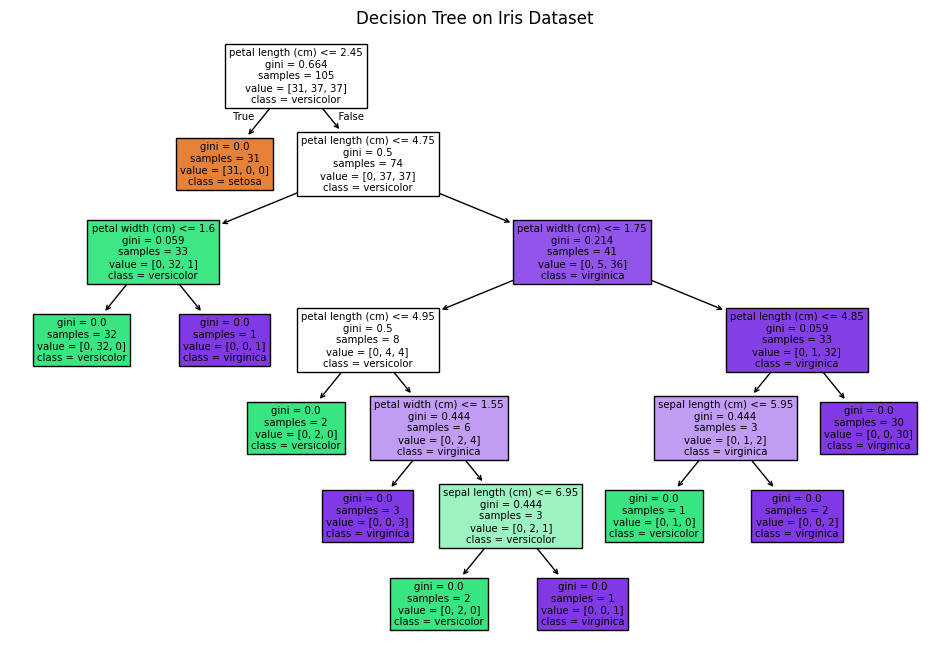

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree on Iris Dataset")
plt.show()

SVM exp 6

Accuracy: 0.8


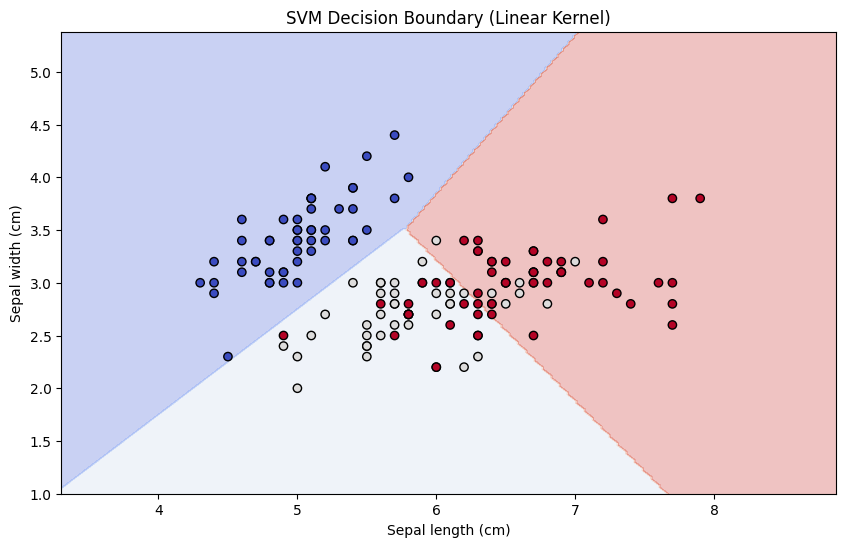

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

# Select only the first two features for both training and plotting
X_features = iris.data[:, :2] # This is the X with 2 features
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

def plot_decision_boundary(X_data, y_data, model_to_plot):
    h = 0.02
    x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # The model_to_plot is trained on 2 features, so this prediction works.
    Z = model_to_plot.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.title('SVM Decision Boundary (Linear Kernel)')
    plt.show()

# Pass the 2-feature data and the 2-feature trained model to the plotting function
plot_decision_boundary(X_features, y, model)

K means exp 9

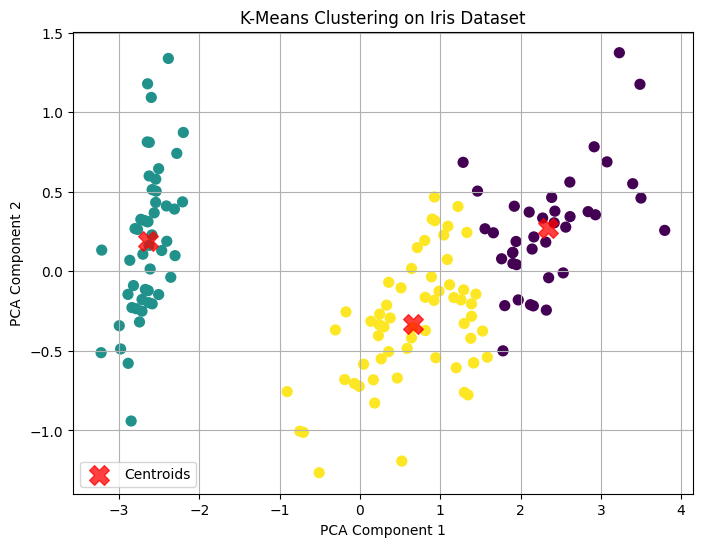

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


iris = load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


PCA exp 10

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = {
    'Example 1': [4, 11],
    'Example 2': [8, 4],
    'Example 3': [13, 5],
    'Example 4': [7, 14]
}


df = pd.DataFrame(data, index=['X1', 'X2'])
print("Original Data:\n", df, "\n")

X = df.T.values
print("Data Matrix (examples as rows):\n", X, "\n")

scaler = StandardScaler(with_std=False)
X_centered = scaler.fit_transform(X)
print("Mean-Centered Data:\n", X_centered, "\n")



pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)



print("Principal Components (each column = PC direction):\n", pca.components_.T, "\n")
print("Explained Variance:\n", pca.explained_variance_, "\n")
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_, "\n")

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print("Transformed Dataset (in PCA space):\n", df_pca)

Original Data:
     Example 1  Example 2  Example 3  Example 4
X1          4          8         13          7
X2         11          4          5         14 

Data Matrix (examples as rows):
 [[ 4 11]
 [ 8  4]
 [13  5]
 [ 7 14]] 

Mean-Centered Data:
 [[-4.   2.5]
 [ 0.  -4.5]
 [ 5.  -3.5]
 [-1.   5.5]] 

Principal Components (each column = PC direction):
 [[-0.55738997  0.83025082]
 [ 0.83025082  0.55738997]] 

Explained Variance:
 [30.38486432  6.61513568] 

Explained Variance Ratio:
 [0.82121255 0.17878745] 

Transformed Dataset (in PCA space):
         PC1       PC2
0  4.305187 -1.927528
1 -3.736129 -2.508255
2 -5.692828  2.200389
3  5.123769  2.235394


Random forest exp 11

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


data = load_iris()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




feature_importance = pd.Series(rf.feature_importances_, index=data.feature_names)
print("\nFeature Importances:\n", feature_importance)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Feature Importances:
 sepal length (cm)    0.104105
sepal width (cm)     0.044605
petal length (cm)    0.417308
petal width (cm)     0.433982
dtype: float64
